## Importing the dependencies

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Loading the dataset


In [84]:
df = pd.read_csv('/content/diabetes.csv')

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Analysis

In [86]:
df.shape

(768, 9)

In [87]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [88]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [89]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Setting the theme

In [91]:
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

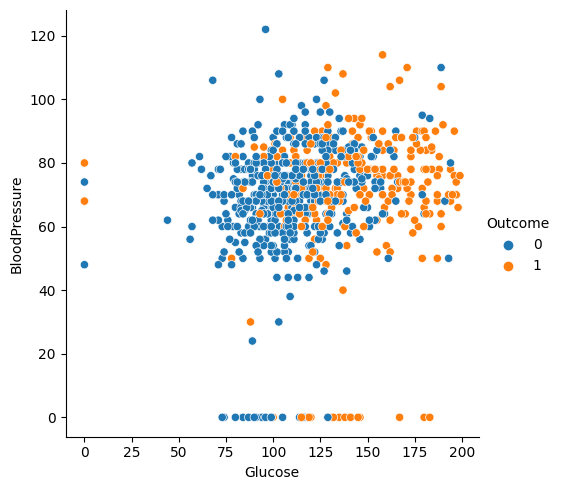

In [92]:
sns.relplot(data=df, x='Glucose', y='BloodPressure', hue='Outcome')

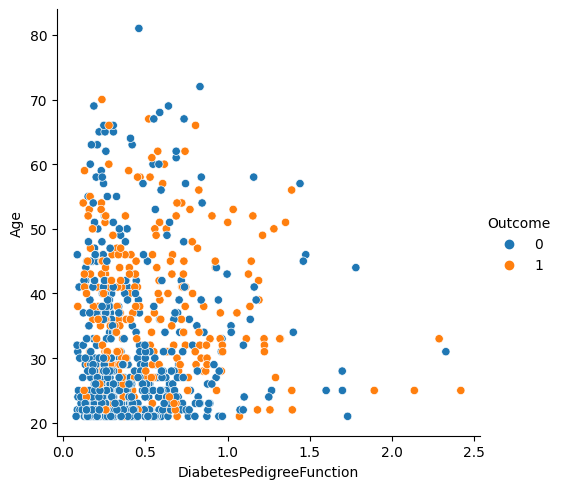

In [93]:
sns.relplot(data=df, x='DiabetesPedigreeFunction', y='Age', hue='Outcome')

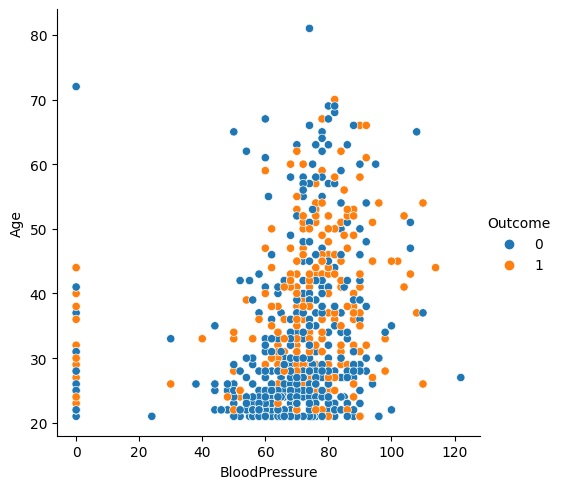

In [94]:
sns.relplot(data=df, x='BloodPressure', y='Age', hue='Outcome')

<Axes: xlabel='Outcome', ylabel='count'>

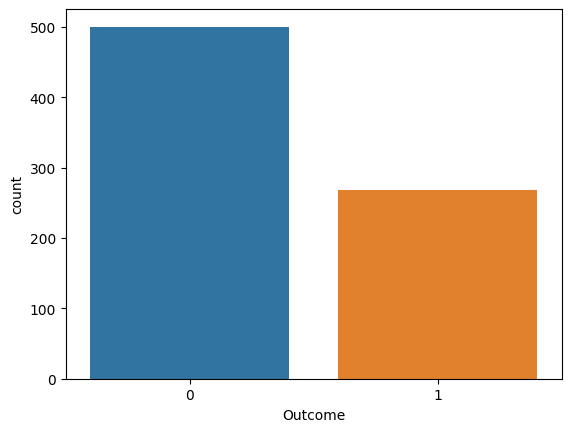

In [95]:
sns.countplot(data=df, x='Outcome')

## Independent and Dependent Variable

In [96]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

In [97]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [98]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Data Standardization

In [99]:
scaler = StandardScaler()

In [100]:
X = scaler.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


## Training and Test data split



In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

In [102]:
print('X_train shape : {} \nX_test shape : {} \ny_train shape : {} \ny_test shape : {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape : (614, 8) 
X_test shape : (154, 8) 
y_train shape : (614,) 
y_test shape : (154,)


## Model Building

In [103]:
classifier = svm.SVC(kernel='linear')

In [104]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation

## Accuracy Score

In [105]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [106]:
print('Training data accuracy :', training_data_accuracy)

Training data accuracy : 0.7833876221498371


In [107]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [108]:
print('Test data accuracy :', test_data_accuracy)

Test data accuracy : 0.7792207792207793


## Making a predictive system

In [109]:
# getting the input
input_data = (8, 183,	64, 0, 0, 23.3, 0.672, 32)

# converting the input into np array
input_np = np.asarray(input_data)

# reshaping the input array
input_np = input_np.reshape(1, -1)


# Standardizing the input 
input_np = scaler.fit_transform(input_np)

# predicting the result
prediction = classifier.predict(input_np)

if prediction[0] == 1:
  print('The person has the Diabetes')
else:
  print('No. The person doesn\'t have Diabetes')

No. The person doesn't have Diabetes
